In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [ ]:
# Load the data

df = pd.read_excel('/content/ml_data.xlsx')

df.head(5)

,customer_id,register_to_order,first_to_last_order,total_unit,total_spent
0,C111795L,-151,31,2,215760
1,C111808L,-10,0,1,229100
2,C112088L,156,0,4,5800000
3,C112612L,6,0,1,278400
4,C112901L,13,0,1,57942


In [ ]:
# Group registered first
df_normal = df[df['register_to_order'] >= 0].copy()

# Group pre-registration
df_pre_register = df[df['register_to_order'] < 0].copy()

print('Normal customer: ', df_normal.shape[0])
print('Pre-registered customer: ', df_pre_register.shape[0])


Normal customer:  1984
Pre-registered customer:  880


In [ ]:
features =  ['register_to_order',
             'first_to_last_order',
             'total_unit',
             'total_spent'
             ]

In [ ]:
# Standarization => limit the data range into mean = 0 and standard deviation = 1
# Normalizatoin => limit the data range between 0 and 1

scaler_normal = StandardScaler()
X_normal_scaled =scaler_normal.fit_transform(df_normal[features])


scaler_pre = StandardScaler()
X_pre_scaled = scaler_pre.fit_transform(df_pre_register[features])

In [ ]:
# Train the model

kmeans = KMeans(n_clusters=3, random_state=42)
df_normal['cluster'] = kmeans.fit_predict(X_normal_scaled)

In [ ]:
kmeans_pre = KMeans(n_clusters=3, random_state=42)
df_pre_register['cluster'] = kmeans_pre.fit_predict(X_pre_scaled)

In [ ]:
# Summary of the model

cluster_summary = (
    df_normal
    .groupby('cluster')[features]
    .mean()
    .round(2)
)

cluster_summary

,register_to_order,first_to_last_order,total_unit,total_spent
cluster,,,,
0,78.03,2.28,1.88,8.131629e+05
1,77.00,0.00,1000.00,5.187520e+08
2,61.94,224.06,11.11,4.807610e+06


In [ ]:
# Summary of the model

cluster_summary = (
    df_pre_register
    .groupby('cluster')[features]
    .mean()
    .round(2)
)

cluster_summary

,register_to_order,first_to_last_order,total_unit,total_spent
cluster,,,,
0,-26.65,16.46,1.67,796472.42
1,-124.20,471.16,23.93,22278599.80
2,-172.18,40.07,2.01,714594.28


In [ ]:
# Mapping ()
cluster_labels = {
    0: "Normal but Low Engagement",
    1: "Extreme High-Volume",
    2: "Loyal, High-Value Customer"
}
df_normal["segment"] = df_normal["cluster"].map(cluster_labels)
df_normal.head(5)

,customer_id,register_to_order,first_to_last_order,total_unit,total_spent,cluster,segment
2,C112088L,156,0,4,5800000,0,Normal but Low Engagement
3,C112612L,6,0,1,278400,0,Normal but Low Engagement
4,C112901L,13,0,1,57942,0,Normal but Low Engagement
5,C113061L,194,305,3,507442,2,"Loyal, High-Value Customer"
8,C114466L,192,0,3,174000,0,Normal but Low Engagement


In [ ]:
# Mapping pre-registered
cluster_labels = {
    0: "Normal but Low Engagement",
    1: "Extreme High-Volume",
    2: "Loyal, High-Value Customer"
}
df_pre_register["segment"] = df_pre_register["cluster"].map(cluster_labels)

<Axes: xlabel='total_spent', ylabel='total_unit'>

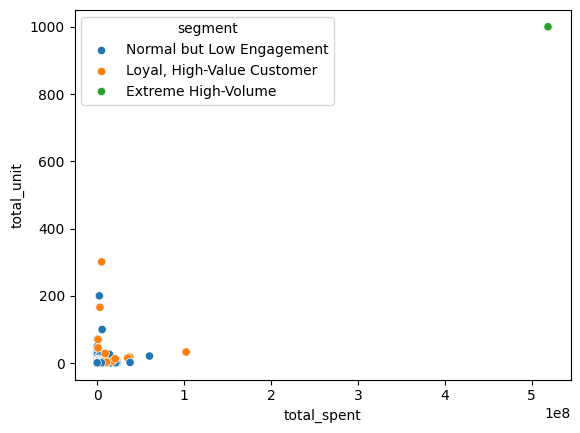

In [ ]:
# visualize the data
sns.scatterplot(
    data=df_normal,
    x='total_spent',
    y='total_unit',
    hue='segment',
    palette='tab10'
)

<Axes: xlabel='total_spent', ylabel='total_unit'>

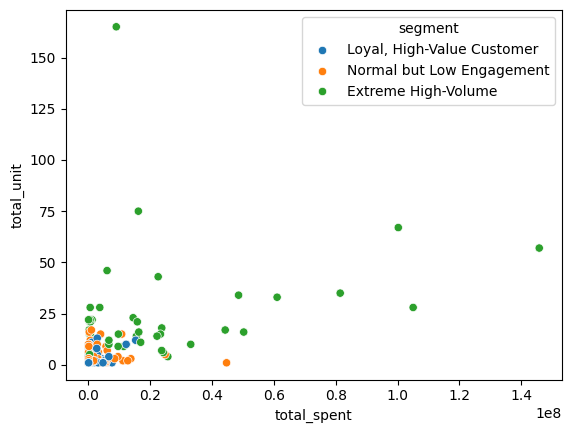

In [ ]:
# visualize the data
sns.scatterplot(
    data=df_pre_register,
    x='total_spent',
    y='total_unit',
    hue='segment',
    palette='tab10'
)

In [ ]:
# Combine the data

df_normal['segment_type'] = 'normal'
df_pre_register['segment_type'] = 'pre_register'

In [ ]:
df_segmented = pd.concat([df_normal, df_pre_register])

In [ ]:
df_segmented.tail(5)

,customer_id,register_to_order,first_to_last_order,total_unit,total_spent,cluster,segment,segment_type
2852,C995967L,-74,97,2,67802,0,Normal but Low Engagement,pre_register
2858,C997231L,-11,0,1,49880,0,Normal but Low Engagement,pre_register
2859,C997696L,-126,0,1,109910,2,"Loyal, High-Value Customer",pre_register
2861,C998685L,-198,0,1,116000,2,"Loyal, High-Value Customer",pre_register
2863,C998847L,-145,0,1,86942,2,"Loyal, High-Value Customer",pre_register


In [ ]:
# save the data
df_segmented.to_excel('customer_segment.xlsx', index=False)